Installations

In [3]:
import sklearn
import statistics
from statistics import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import sys, os, re
import datetime
from dateutil import parser 

In [5]:
df = pd.read_csv('dataset_toxicity_sd.csv')
df.head()

,ID,smiles,toxic,FormalCharge,TPSA,MolWt,HeavyAtoms,NHOH,HAcceptors,HDonors,Heteroatoms,AromaticRings,SaturatedRings,AromaticOH,AromaticN,LogP
0,25239916,c1c2c(c(c(c1[131I])[O-])[131I])Oc3c(cc(c(c3[13...,0,-2,81.65,987.667498,33,0,5,0,13,3,0,0,0,7.4338
1,25239917,CCC[C@@H]1C[C@H]([NH+](C1)C)C(=O)N[C@@H]([C@@H...,0,1,123.69,407.553000,27,6,7,6,9,0,2,4,0,-2.2741
2,25239918,CNC(=O)c1cc(ccn1)Oc2ccc(cc2)NC(=O)Nc3ccc(c(c3)...,0,0,92.35,464.831000,32,3,4,3,11,3,0,0,1,5.5497
3,25239919,CN(C)c1cccc2c1ccc(c2)S(=O)(=O)[O-],0,-1,60.44,250.299000,17,0,4,0,5,2,0,0,0,1.8099
4,25239920,CC(C)c1ccc2c(c1)c(=O)c3cc(c(nc3o2)N)C(=O)[O-],0,-1,109.25,297.290000,22,2,6,1,6,3,0,0,1,1.4103


In [7]:
df[['toxic', 'MolWt', 'TPSA', 'LogP']].describe()

,toxic,MolWt,TPSA,LogP
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.064384,382.356525,95.362767,1.292078
std,0.245519,228.985999,89.443235,3.163150
min,0.000000,27.026000,0.000000,-19.396500
25%,0.000000,253.275000,44.750000,-0.156250
50%,0.000000,334.350500,75.270000,1.550400
75%,0.000000,440.557250,112.625000,3.143200
max,1.000000,1882.332000,833.780000,12.605800


In [8]:
df.describe()

,ID,toxic,FormalCharge,TPSA,MolWt,HeavyAtoms,NHOH,HAcceptors,HDonors,Heteroatoms,AromaticRings,SaturatedRings,AromaticOH,AromaticN,LogP
count,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2.524065e+07,0.064384,0.132192,95.362767,382.356525,26.087671,2.785616,5.113699,2.226712,7.317808,1.427397,0.896575,0.643151,0.659589,1.292078
std,4.274412e+02,0.245519,1.094408,89.443235,228.985999,15.553458,3.680143,4.349937,2.866693,5.854679,1.209202,1.267342,1.376659,1.231252,3.163150
min,2.523992e+07,0.000000,-10.000000,0.000000,27.026000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.396500
25%,2.524028e+07,0.000000,0.000000,44.750000,253.275000,17.000000,1.000000,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-0.156250
50%,2.524066e+07,0.000000,0.000000,75.270000,334.350500,23.000000,2.000000,4.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000,1.550400
75%,2.524102e+07,0.000000,1.000000,112.625000,440.557250,31.000000,3.000000,6.000000,3.000000,9.000000,2.000000,1.000000,1.000000,1.000000,3.143200
max,2.524139e+07,1.000000,6.000000,833.780000,1882.332000,136.000000,28.000000,51.000000,25.000000,67.000000,10.000000,10.000000,13.000000,8.000000,12.605800


<Axes: xlabel='FormalCharge', ylabel='TPSA'>

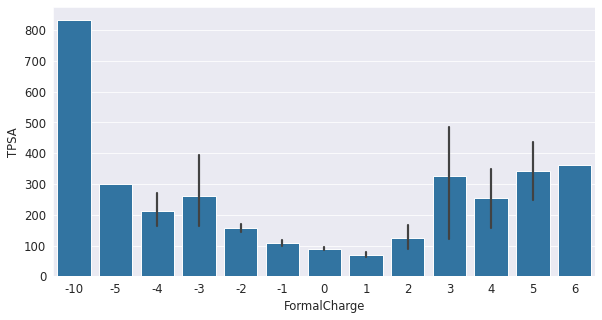

In [9]:
import matplotlib.pyplot as plt
from matplotlib import rc
font = {'size': 12}
matplotlib.rc('font', **font)
plt.figure(figsize=(10,5), dpi=70)
sns.barplot(x='FormalCharge', y='TPSA', data=df)

<Axes: xlabel='FormalCharge', ylabel='HDonors'>

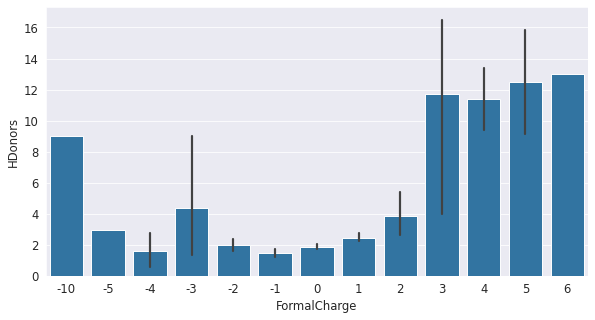

In [10]:
plt.figure(figsize=(10,5), dpi=70)
sns.barplot(x='FormalCharge', y='HDonors', data=df)

In [11]:
df_iso = df[['FormalCharge', 'HDonors', 'HAcceptors']]
df_iso.head()

,FormalCharge,HDonors,HAcceptors
0,-2,0,5
1,1,6,7
2,0,3,4
3,-1,0,4
4,-1,1,6


In [12]:
df_melted = pd.melt(df, id_vars='FormalCharge', value_vars=['HDonors'])
df_melted.head()

,FormalCharge,variable,value
0,-2,HDonors,0
1,1,HDonors,6
2,0,HDonors,3
3,-1,HDonors,0
4,-1,HDonors,1


<Axes: xlabel='FormalCharge', ylabel='value'>

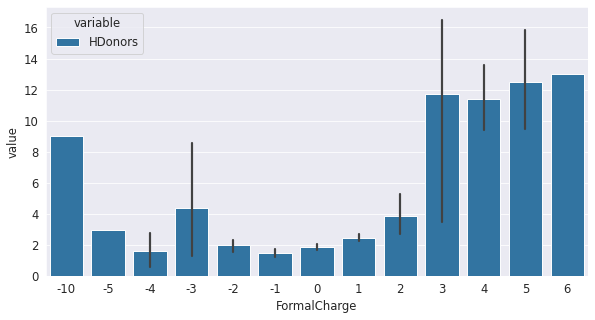

In [13]:
plt.figure(figsize=(10,5), dpi=70)
sns.barplot(data=df_melted, x='FormalCharge', y='value', hue='variable')

In [14]:
df.columns

Index(['ID', 'smiles', 'toxic', 'FormalCharge', 'TPSA', 'MolWt', 'HeavyAtoms',
       'NHOH', 'HAcceptors', 'HDonors', 'Heteroatoms', 'AromaticRings',
       'SaturatedRings', 'AromaticOH', 'AromaticN', 'LogP'],
      dtype='object')

<Axes: title={'center': 'Molecular Weight gram/mol'}, xlabel='Molecular Weight gram/mol', ylabel='Frequency'>

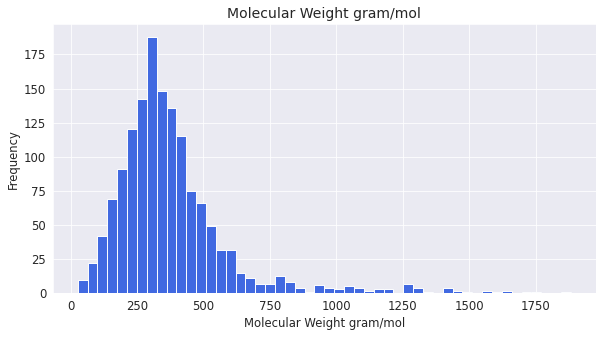

In [15]:
plt.figure(figsize=(10,5), dpi=70)
plt.title('Molecular Weight gram/mol')
plt.xlabel('Molecular Weight gram/mol')
plt.ylabel('Frequency')
df['MolWt'].hist(bins=50, color='royalblue')

In [ ]:
df.columns,

(Index(['ID', 'smiles', 'toxic', 'FormalCharge', 'TPSA', 'MolWt', 'HeavyAtoms',
        'NHOH', 'HAcceptors', 'HDonors', 'Heteroatoms', 'AromaticRings',
        'SaturatedRings', 'AromaticOH', 'AromaticN', 'LogP'],
       dtype='object'),)

<Figure size 700x350 with 0 Axes>

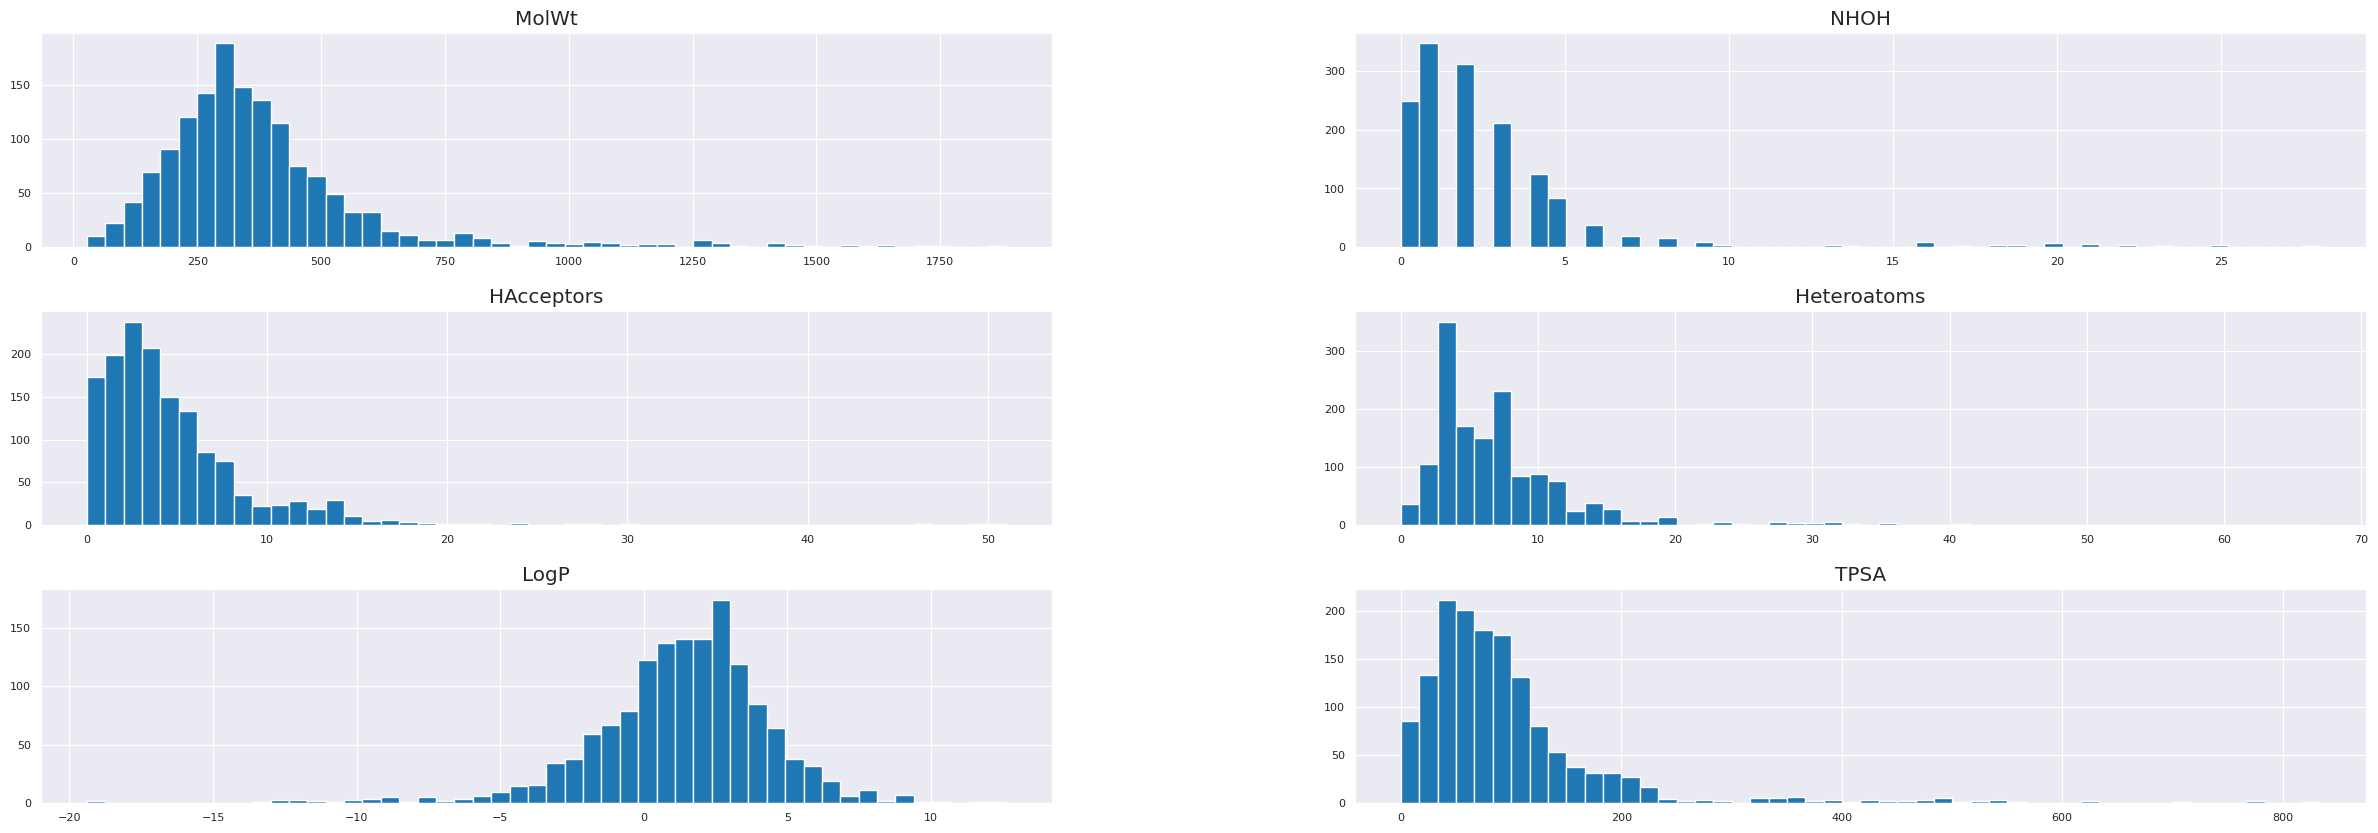

In [16]:
plt.figure(figsize=(10,5), dpi=70)
df_temp = df[['MolWt', 'NHOH', 'HAcceptors', 'Heteroatoms', 'LogP', 'TPSA']]
fig = df_temp.hist(figsize=(30,10), bins=50, xlabelsize=8, ylabelsize=8)

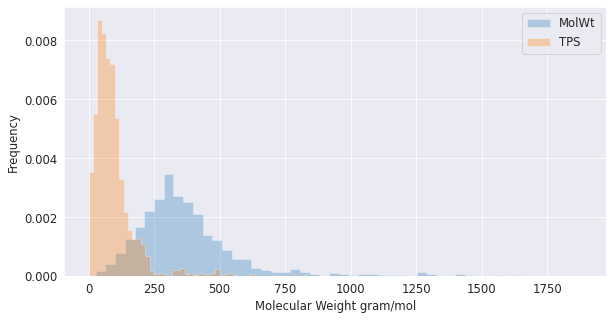

In [18]:
df_temp = df[['MolWt', 'TPSA']]
x1, x2 = df_temp.MolWt.values, df_temp.TPSA.values
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=50)
plt.figure(figsize=(10,5), dpi=70)
plt.hist(x1, **kwargs, label='MolWt')
plt.hist(x2, **kwargs, label='TPS')
plt.xlabel('Molecular Weight gram/mol')
plt.ylabel('Frequency')
plt.legend()

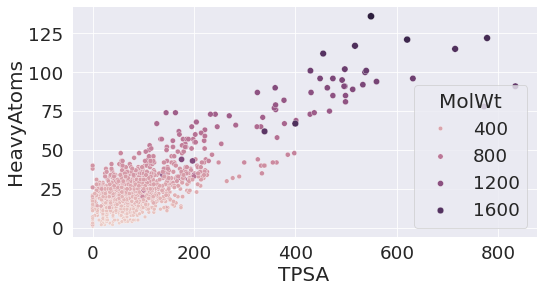

In [71]:
fig, ax = plt.subplots(figsize=(10,5), dpi=60)
ax = sns.scatterplot(data=df, x='TPSA', y='HeavyAtoms', size='MolWt', hue='MolWt')

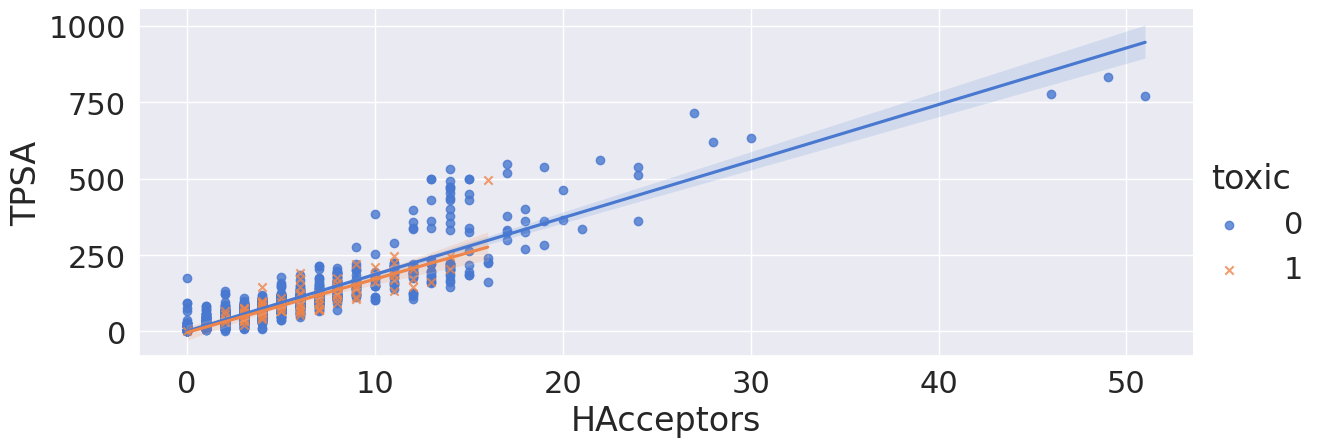

In [67]:
sns.lmplot(x='HAcceptors', y='TPSA', hue='toxic', data=df, markers=['o', 'x'],
           aspect=2.5, palette='muted')

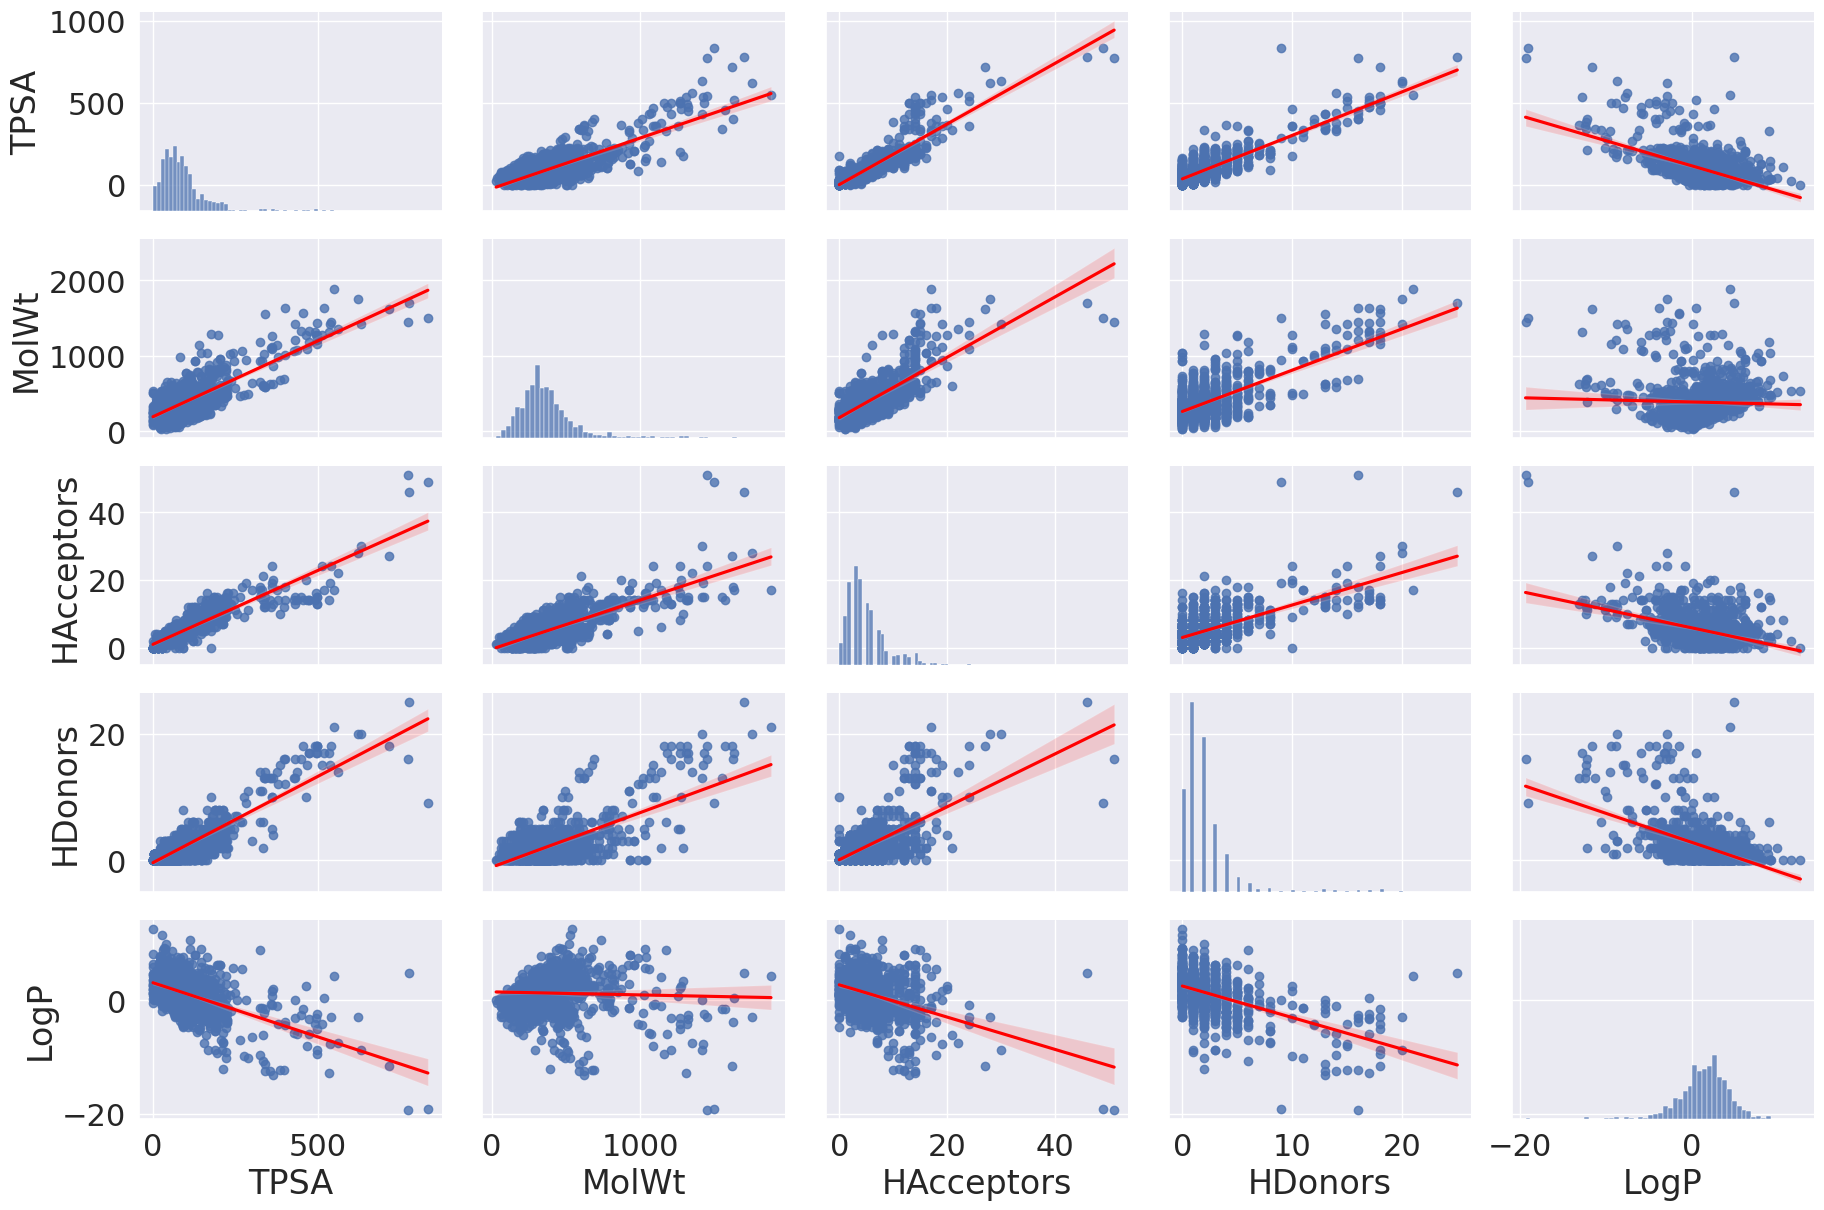

In [53]:
features_of_interest = ['TPSA', 'MolWt', 'HAcceptors', 'HDonors', 'LogP']
sns.set(font_scale=2)
sns.pairplot(df[features_of_interest], markers='o', kind='reg',
             aspect=1.5, plot_kws={'line_kws':{'color':'red'}})

In [22]:
!pip install pillow

In [23]:
import plotly.express as px
fig = px.scatter_3d(df, x='MolWt', y='TPSA', z='HeavyAtoms', color='toxic', opacity=0.8)
fig.update_traces(marker=dict(size=4), selector=dict(mode='markers'))
fig.show()

TimeSeries

In [30]:
from Bio import SeqIO
from Bio.SeqUtils import GC123
import pylab

gc_values_covid = sorted(
    GC123(record.seq) for record in SeqIO.parse('covid-19.fasta', 'fasta'))
gc_values_covid[9:10]

[(28.169014084507044,
  25.925925925925927,
  30.434782608695652,
  28.571428571428573)]

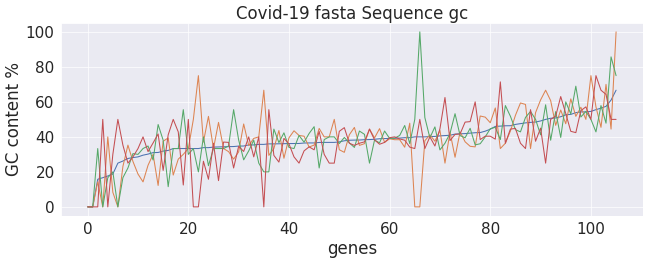

In [34]:
import pylab
plt.figure(figsize=(15,5), dpi =50)
plt.title('Covid-19 fasta Sequence gc')
plt.xlabel('genes',)
plt.ylabel('GC content %')
pylab.plot(gc_values_covid)
pylab.show()